In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install prophet
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

Importing plotly failed. Interactive plots will not work.


In [3]:
# Read csv file to dataframe
ec_all_df = pd.read_csv("electric_consumption.csv", low_memory=False)

In [4]:
# Print dataframe
ec_all_df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.00,2808.00,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.00,2912.00,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.00,2808.00,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.00,2704.00,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.00,2808.00,5323.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407026,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 02,INTERVAL,NaN,163.0,272,K016300,FEDERAL,...,1096666,Y,4765.63,GOV/NYC/068,Exception,0,0.00,150.48,1769.64,2995.99
407027,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,INTERVAL,NaN,163.0,272,K016300,FEDERAL,...,1096667,Y,4275.38,GOV/NYC/068,Exception,0,0.00,135.00,1587.60,2687.78
407028,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,AMR,NaN,163.0,272,K016300,FEDERAL,...,8096664,Y,6213.06,GOV/NYC/068,Exception,59600,2307.12,0.00,0.00,3905.94
407029,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 02,AMR,NaN,163.0,272,K016300,FEDERAL,...,8096666,Y,8756.66,GOV/NYC/068,Exception,84000,3251.64,0.00,0.00,5505.02


In [5]:
# Get dataframe data-types
ec_all_df.dtypes

Development Name       object
Borough                object
Account Name           object
Location               object
Meter AMR              object
Meter Scope            object
TDS #                 float64
EDP                     int64
RC Code                object
Funding Source         object
AMP #                  object
Vendor Name            object
UMIS BILL ID            int64
Revenue Month          object
Service Start Date     object
Service End Date       object
# days                float64
Meter Number           object
Estimated              object
Current Charges       float64
Rate Class             object
Bill Analyzed          object
Consumption (KWH)       int64
KWH Charges           float64
Consumption (KW)      float64
KW Charges            float64
Other charges         float64
dtype: object

In [6]:
# Get dataframe columns
ec_all_df.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [7]:
ec_all_df['Service End Date'] = pd.to_datetime(ec_all_df['Service End Date'])

In [8]:
ec_all_df.isnull().sum()

Development Name        1086
Borough                    0
Account Name               0
Location               10625
Meter AMR                186
Meter Scope           385539
TDS #                   2343
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1886
Vendor Name                0
UMIS BILL ID               0
Revenue Month              0
Service Start Date         8
Service End Date           8
# days                     8
Meter Number               0
Estimated                342
Current Charges            0
Rate Class                 0
Bill Analyzed              0
Consumption (KWH)          0
KWH Charges                0
Consumption (KW)           0
KW Charges                 0
Other charges              0
dtype: int64

In [9]:
ec_all_df.dropna(inplace=True)

In [10]:
ec_all_df.isnull().sum()

Development Name      0
Borough               0
Account Name          0
Location              0
Meter AMR             0
Meter Scope           0
TDS #                 0
EDP                   0
RC Code               0
Funding Source        0
AMP #                 0
Vendor Name           0
UMIS BILL ID          0
Revenue Month         0
Service Start Date    0
Service End Date      0
# days                0
Meter Number          0
Estimated             0
Current Charges       0
Rate Class            0
Bill Analyzed         0
Consumption (KWH)     0
KWH Charges           0
Consumption (KW)      0
KW Charges            0
Other charges         0
dtype: int64

In [11]:
ec_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21049 entries, 0 to 406352
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Development Name    21049 non-null  object        
 1   Borough             21049 non-null  object        
 2   Account Name        21049 non-null  object        
 3   Location            21049 non-null  object        
 4   Meter AMR           21049 non-null  object        
 5   Meter Scope         21049 non-null  object        
 6   TDS #               21049 non-null  float64       
 7   EDP                 21049 non-null  int64         
 8   RC Code             21049 non-null  object        
 9   Funding Source      21049 non-null  object        
 10  AMP #               21049 non-null  object        
 11  Vendor Name         21049 non-null  object        
 12  UMIS BILL ID        21049 non-null  int64         
 13  Revenue Month       21049 non-null  object   

In [12]:
ec_df = ec_all_df.copy()

In [13]:
# List of columns to drop
drop_columns = ['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
                'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
                'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
                '# days', 'Meter Number', 'Estimated', 'Current Charges', 'Rate Class', 
                'Bill Analyzed', 'Consumption (KWH)', 'Consumption (KW)', 'KW Charges', 'Other charges']

# Drop the dataframe columns from the list using inplace
ec_df.drop(drop_columns, axis=1, inplace=True)

In [14]:
# Print dataframe
ec_df

,Service End Date,KWH Charges
0,2010-01-26,7387.97
1,2010-02-25,6607.87
2,2010-03-26,5919.55
3,2010-04-26,6057.22
4,2010-05-24,5598.34
...,...,...
406348,2021-09-22,14.23
406349,2021-10-22,28.87
406350,2021-11-22,7.51
406351,2021-12-23,4.04


In [15]:
# Check dataframe data-types
ec_df.dtypes

Service End Date    datetime64[ns]
KWH Charges                float64
dtype: object

In [16]:
# Convert Service End Date to pandas datetime object
ec_df['Service End Date'] = pd.to_datetime(ec_df['Service End Date'])

In [17]:
# Print dataframe
ec_df

,Service End Date,KWH Charges
0,2010-01-26,7387.97
1,2010-02-25,6607.87
2,2010-03-26,5919.55
3,2010-04-26,6057.22
4,2010-05-24,5598.34
...,...,...
406348,2021-09-22,14.23
406349,2021-10-22,28.87
406350,2021-11-22,7.51
406351,2021-12-23,4.04


In [18]:
# Print dataframe info
ec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21049 entries, 0 to 406352
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Service End Date  21049 non-null  datetime64[ns]
 1   KWH Charges       21049 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 493.3 KB


In [19]:
# Check for total null values
ec_df.isnull().sum()

Service End Date    0
KWH Charges         0
dtype: int64

In [20]:
# Drop all the null values
ec_df.dropna(inplace=True)

In [21]:
# Check for total null values
ec_df.isnull().sum()

Service End Date    0
KWH Charges         0
dtype: int64

In [26]:
# Create a daily_ec_df
daily_ec_df = ec_df[['Service End Date', 'KWH Charges']].copy()

In [27]:
# Rename the columns to 'ds' & 'y'
daily_ec_df.columns = ['ds', 'y']

In [28]:
# Get dataframe data-types
daily_ec_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [29]:
# Create monthly_ec_df from the daily_ec_df
monthly_ec_df = daily_ec_df.groupby(pd.PeriodIndex(daily_ec_df['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()

In [30]:
# Print monthly_ec_df
monthly_ec_df

,ds,y
0,2010-01-01,1149.970637
1,2010-02-01,1025.322372
2,2010-03-01,969.865513
3,2010-04-01,1017.619103
4,2010-05-01,978.221852
...,...,...
118,2021-09-01,1402.884888
119,2021-10-01,1325.710698
120,2021-11-01,1270.757384
121,2021-12-01,1520.093099


In [31]:
# Create yearly_ec_df from the daily_ec_df
yearly_ec_df = daily_ec_df.groupby(pd.PeriodIndex(daily_ec_df['ds'], freq='Y'))['y'].mean().to_timestamp().reset_index()

In [32]:
# Print yearly_ec_df
yearly_ec_df

,ds,y
0,2010-01-01,1226.779466
1,2011-01-01,5148.290000
2,2012-01-01,1527.944430
3,2013-01-01,1535.812187
4,2014-01-01,1480.277179
5,2015-01-01,1078.720156
6,2016-01-01,974.767463
7,2017-01-01,849.198567
8,2018-01-01,131.453333
9,2019-01-01,1354.582908


<AxesSubplot: xlabel='ds'>

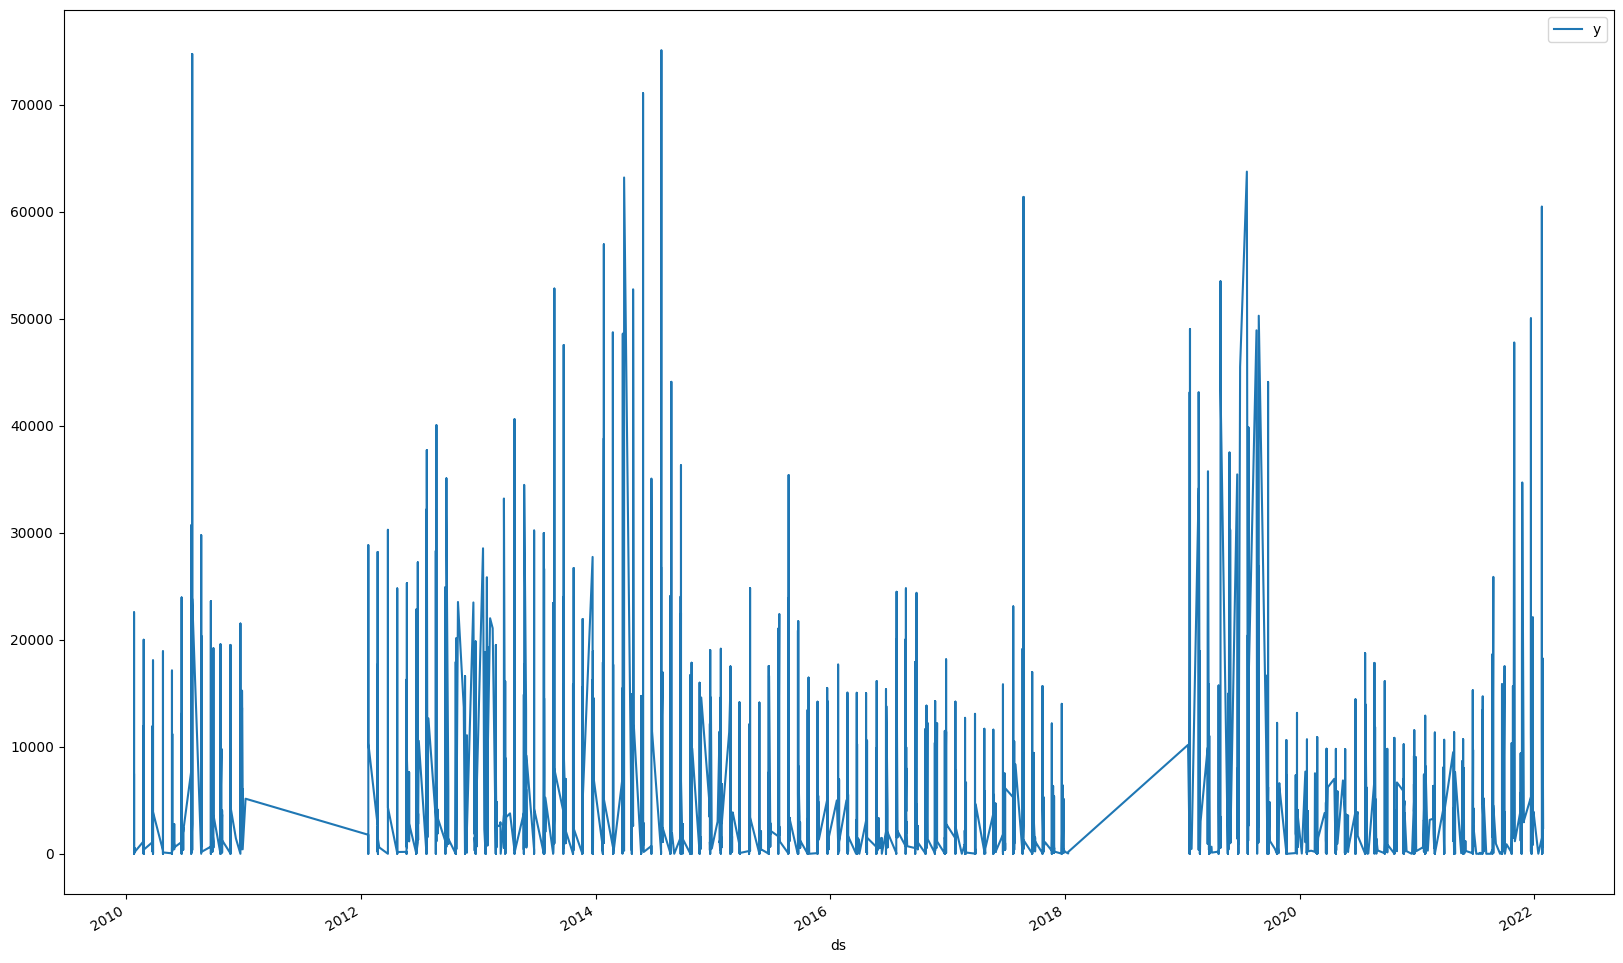

In [76]:
daily_ec_df.plot(x='ds', y='y', figsize=(20,13))

<AxesSubplot: xlabel='ds'>

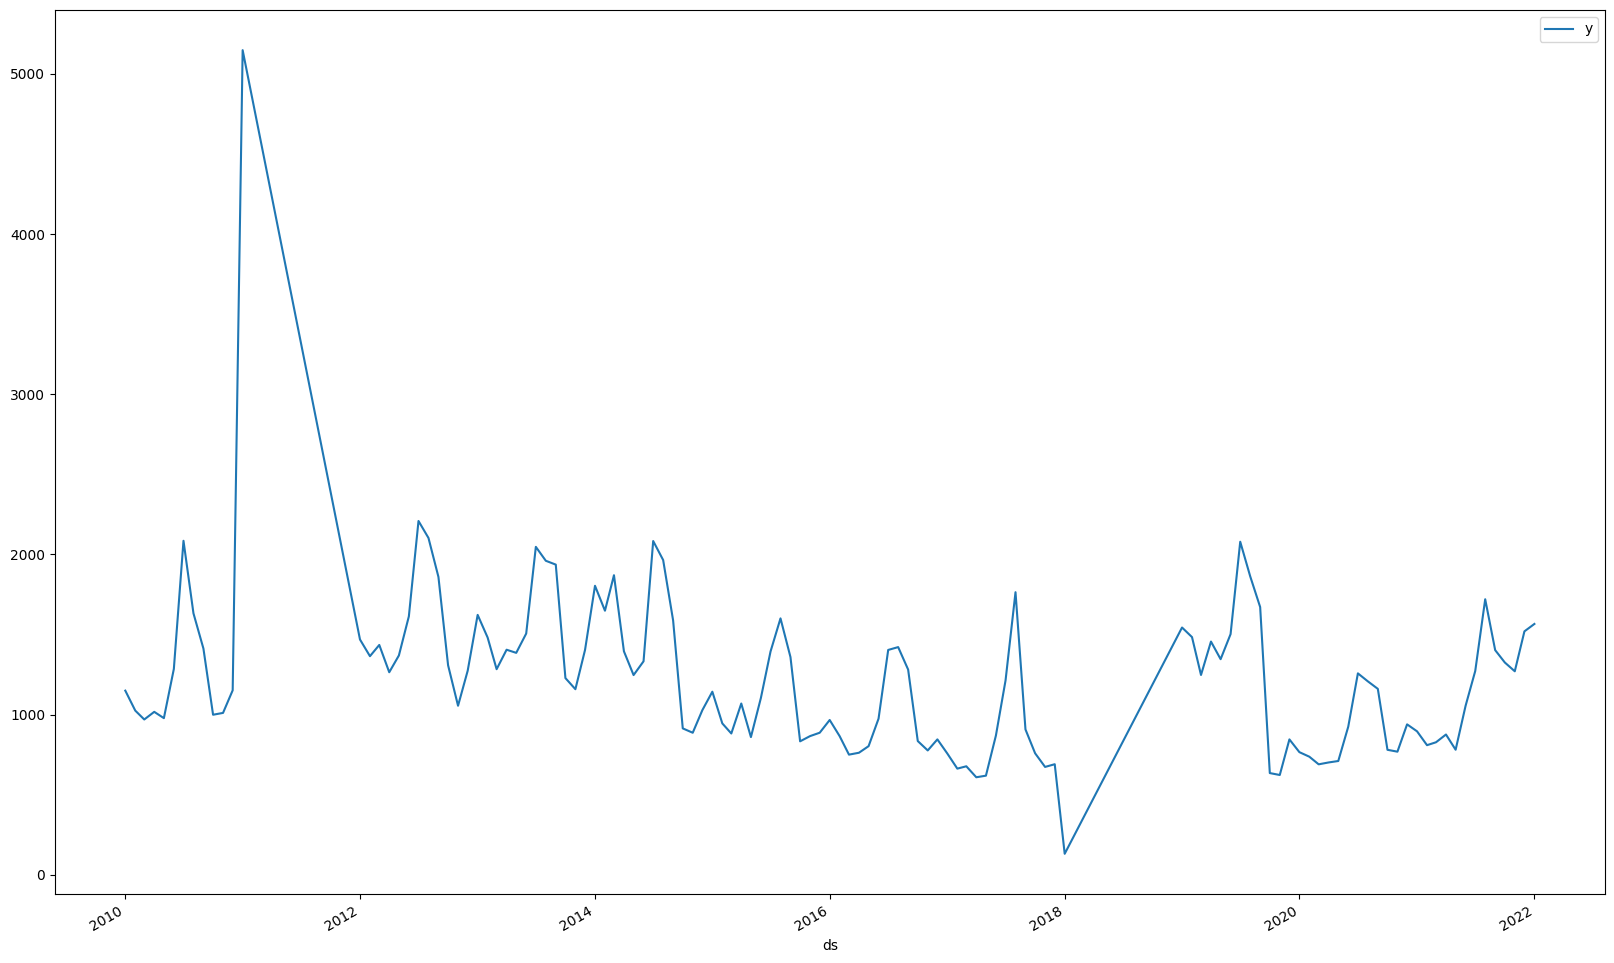

In [77]:
monthly_ec_df.plot(x='ds', y='y', figsize=(20,13))

<AxesSubplot: xlabel='ds'>

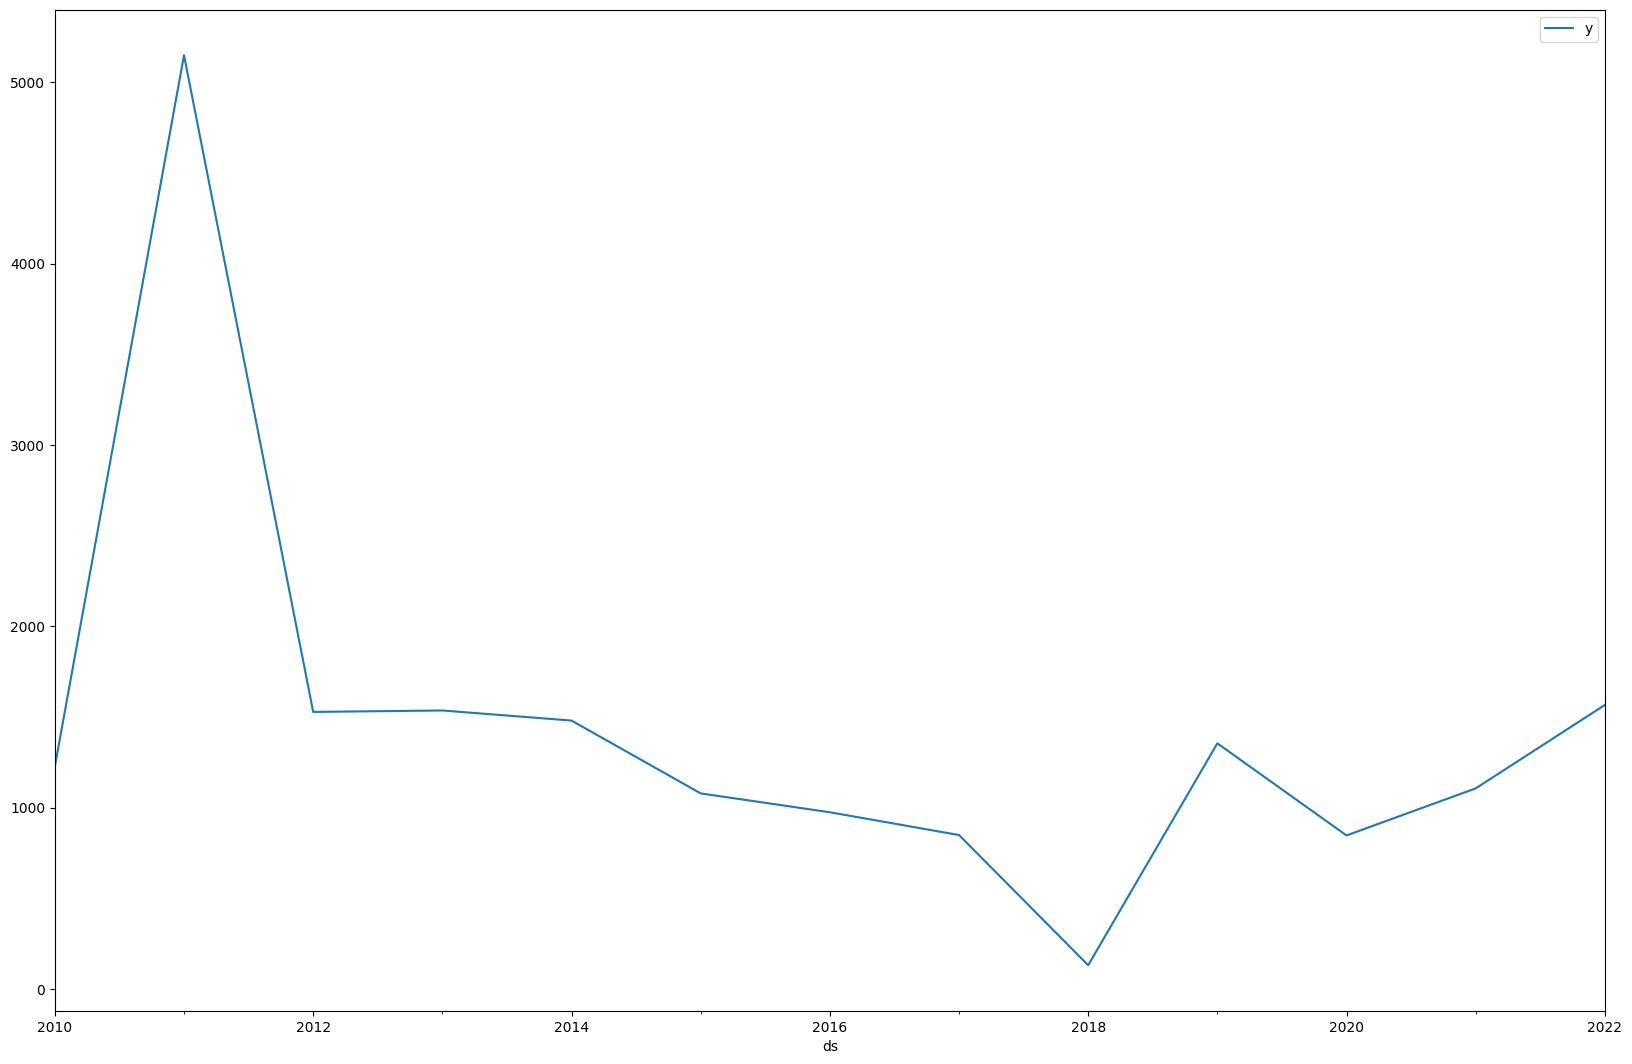

In [78]:
yearly_ec_df.plot(x='ds', y='y', figsize=(20,13))

In [33]:
def train_model(df):
    # Assign None if model exists
    model = None
    # Define model
    model = Prophet()
    # Fit model
    model.fit(df)

    return model

In [87]:
def get_forecast(model, time_period, freq, growth=None):
    future_df = model.make_future_dataframe(periods=time_period, freq=freq)
    if growth == 'logistic':
        future_df['cap'] = 6000
    forecast = model.predict(future_df)
    return future_df, forecast

In [35]:
def forecast_all_plots(model, forecast):
    model.plot(forecast)
    model.plot_components(forecast)

In [36]:
# Daily model
daily_model = train_model(daily_ec_df)

17:53:34 - cmdstanpy - INFO - Chain [1] start processing
17:53:38 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Monthly model
monthly_model = train_model(monthly_ec_df)

17:53:38 - cmdstanpy - INFO - Chain [1] start processing
17:53:39 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# # Yearly model
yearly_model = train_model(yearly_ec_df)

17:53:39 - cmdstanpy - INFO - Chain [1] start processing
17:53:39 - cmdstanpy - INFO - Chain [1] done processing


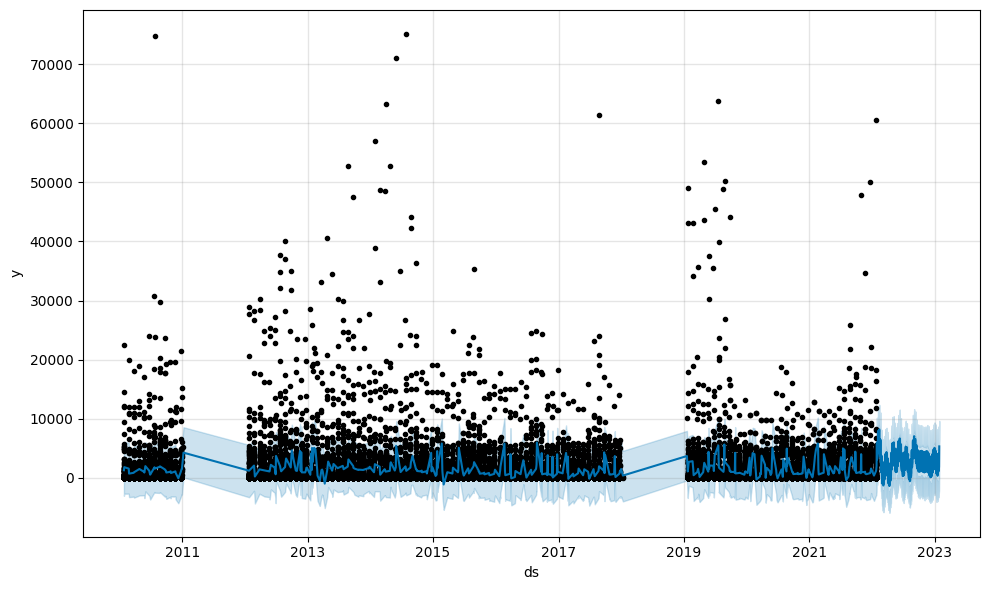

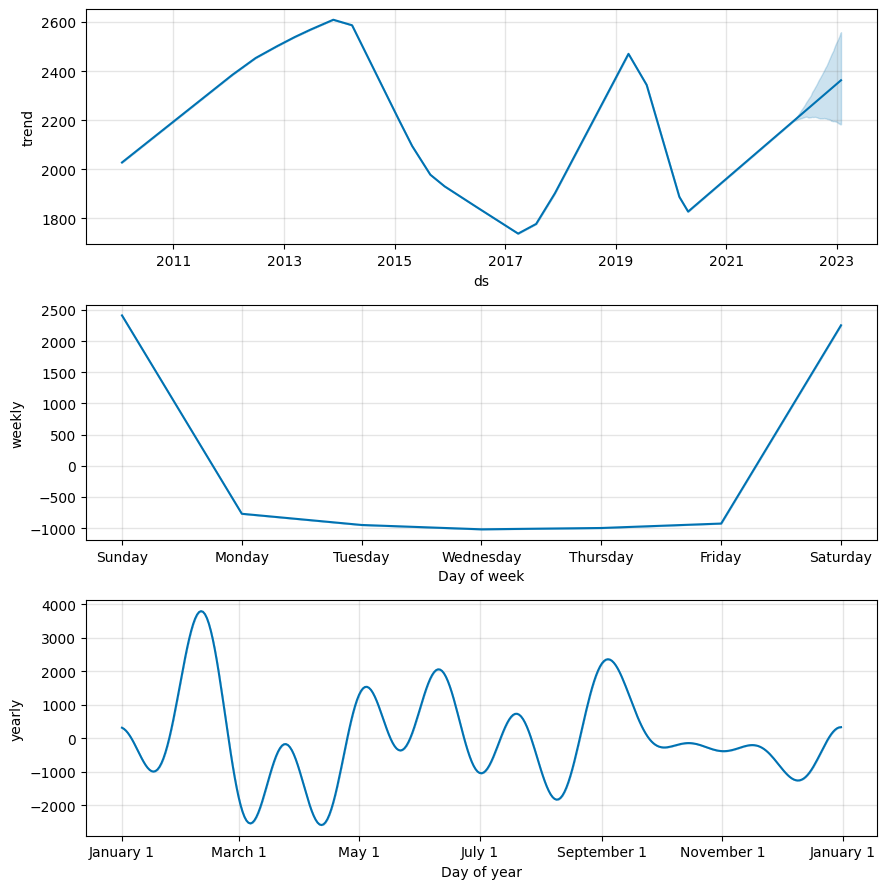

In [39]:
# Forecast Daily Electric Consumption
future_daily_df, forecast_daily = get_forecast(model=daily_model, time_period=365, freq='D')
forecast_all_plots(model=daily_model, forecast=forecast_daily)

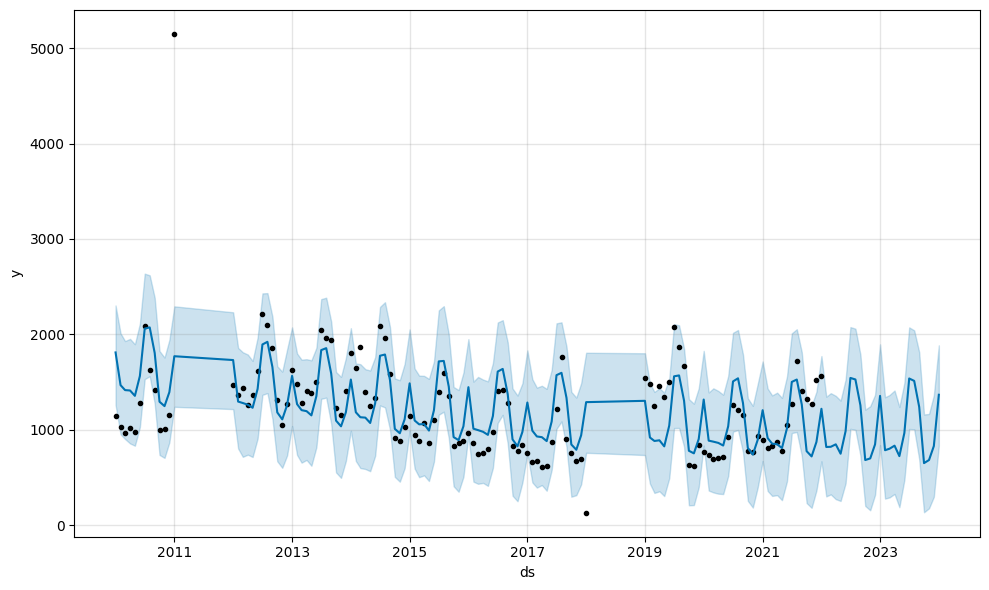

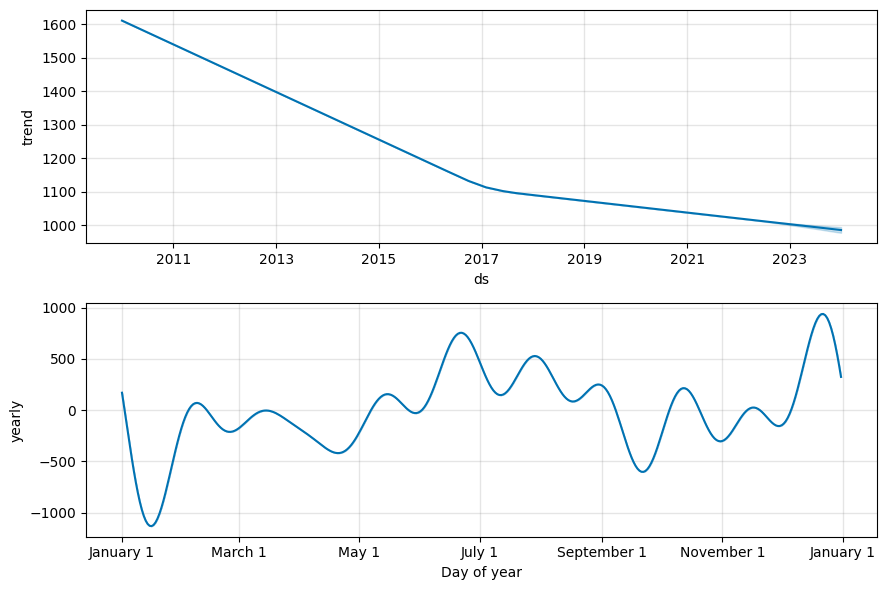

In [40]:
# Forecast Monthly Electric Consumption
future_monthly_df, forecast_monthly = get_forecast(model=monthly_model, time_period=24, freq='M')
forecast_all_plots(model=monthly_model, forecast=forecast_monthly)

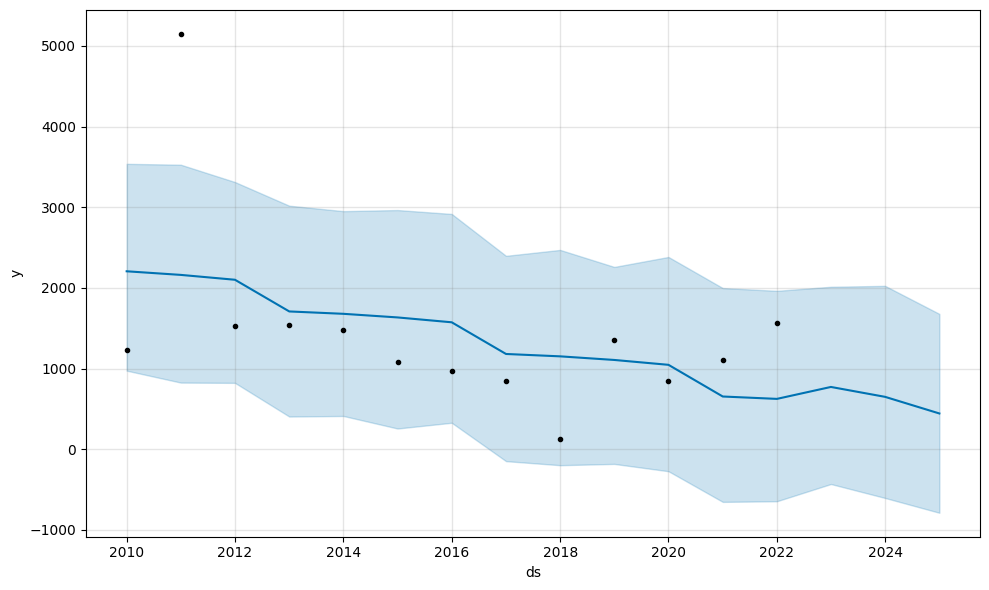

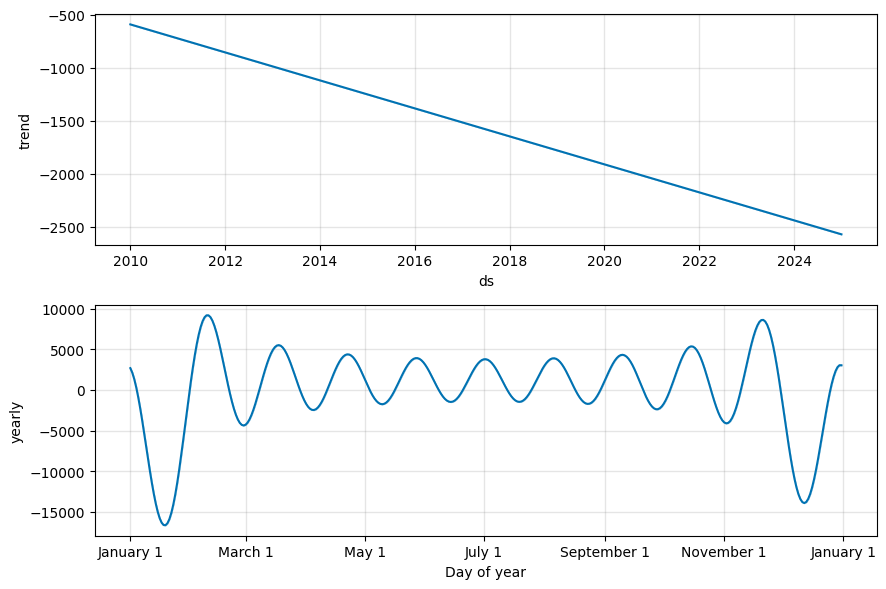

In [41]:
# Forecast Yearly Electric Consumption
future_yearly_df, forecast_yearly = get_forecast(model=yearly_model, time_period=3, freq='Y')
forecast_all_plots(model=yearly_model, forecast=forecast_yearly)

In [85]:
def train_tuned_model(growth, seasonality, df):
    model = None
    
    if growth == 'logistic':
        df['cap'] = 6000
    if seasonality == 'daily':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=1, n_changepoints=30,
                        daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality('daily', period=1, fourier_order=12)
        model.add_country_holidays(country_name='US')
        model.fit(df)

    elif seasonality == 'monthly':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=1, n_changepoints=25,
                        daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=10)
        model.add_seasonality(name='monthly', period=30.5, fourier_order=12)
        model.add_country_holidays(country_name='US')
        model.fit(df)

    elif seasonality == 'yearly':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=1, n_changepoints=2,
                        daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=10)
        model.add_seasonality(name='yearly', period=365.25, fourier_order=100)
        model.add_country_holidays(country_name='US')
        model.fit(df)      

    return model

In [82]:
def evaluate_forecast(forecast, actual, time_period):
    y_true = actual
    y_pred = forecast[:(len(forecast)-time_period)]

    mean_abs_error = mean_absolute_error(y_true, y_pred)
    mean_abs_percentage = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print("Mean Absolute Error :", mean_abs_error)
    print("Mean Absolute Percentage Error :", mean_abs_percentage)
    print("R^2 Score :", r2)
    
    plt.plot(forecast, c='orange', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.show()

In [84]:
def evaluate_daily_forecast(forecast, actual):
    print(len(forecast))
    y_true = actual.values[-len(forecast):]
    y_pred = forecast.values

    mean_abs_error = mean_absolute_error(y_true, y_pred)
    mean_abs_percentage = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Mean Absolute Error :", mean_abs_error)
    print("Mean Absolute Percentage Error :", mean_abs_percentage)
    print("R^2 Score :", r2)

    plt.plot(y_pred, c='orange', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.show()


In [45]:
df_daily_test = pd.DataFrame(daily_ec_df[-100000:])
tuned_model_daily = train_tuned_model(growth='linear', seasonality='daily', df=df_daily_test)

17:53:43 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# tuned_model_daily = train_tuned_model(growth='linear', seasonality='daily', df=daily_ec_df)
# future_daily, forecast_daily = get_forecast(model=tuned_model_daily, time_period=100, freq='D')

In [47]:
tuned_model_monthly = train_tuned_model(growth='linear', seasonality='monthly', df=monthly_ec_df)

17:53:50 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
tuned_model_yearly = train_tuned_model(growth='linear', seasonality='yearly', df=yearly_ec_df)

17:53:50 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing


### Prediction by Day

#### 100 Days

572
Mean Absolute Error : 1315.3756748244803
Mean Absolute Percentage Error : 7.646307610270115e+17
R^2 Score : -0.1817415723825817


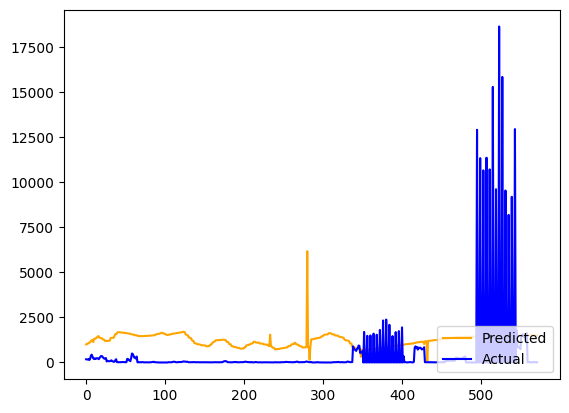

In [49]:
future_daily, forecast_daily = get_forecast(model=tuned_model_daily, time_period=100, freq='D', growth='linear')
evaluate_daily_forecast(forecast_daily['yhat'], daily_ec_df['y'])

#### 200 Days

672
Mean Absolute Error : 1281.5011760982445
Mean Absolute Percentage Error : 6.499003208920389e+17
R^2 Score : -0.2054541433636623


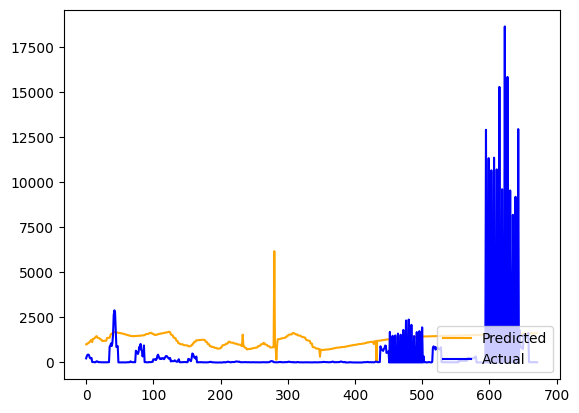

In [50]:
future_daily, forecast_daily = get_forecast(model=tuned_model_daily, time_period=200, freq='D', growth='linear')
evaluate_daily_forecast(forecast_daily['yhat'], daily_ec_df['y'])

#### 365 Days

837
Mean Absolute Error : 1597.304830992772
Mean Absolute Percentage Error : 6.002200331227753e+17
R^2 Score : -0.00011189504852704424


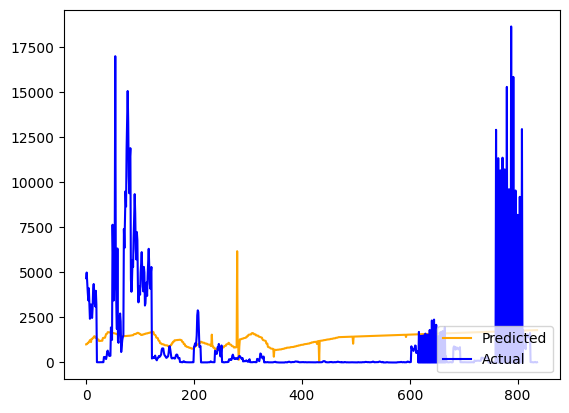

In [51]:
future_daily, forecast_daily = get_forecast(model=tuned_model_daily, time_period=365, freq='D', growth='linear')
evaluate_daily_forecast(forecast_daily['yhat'], daily_ec_df['y'])

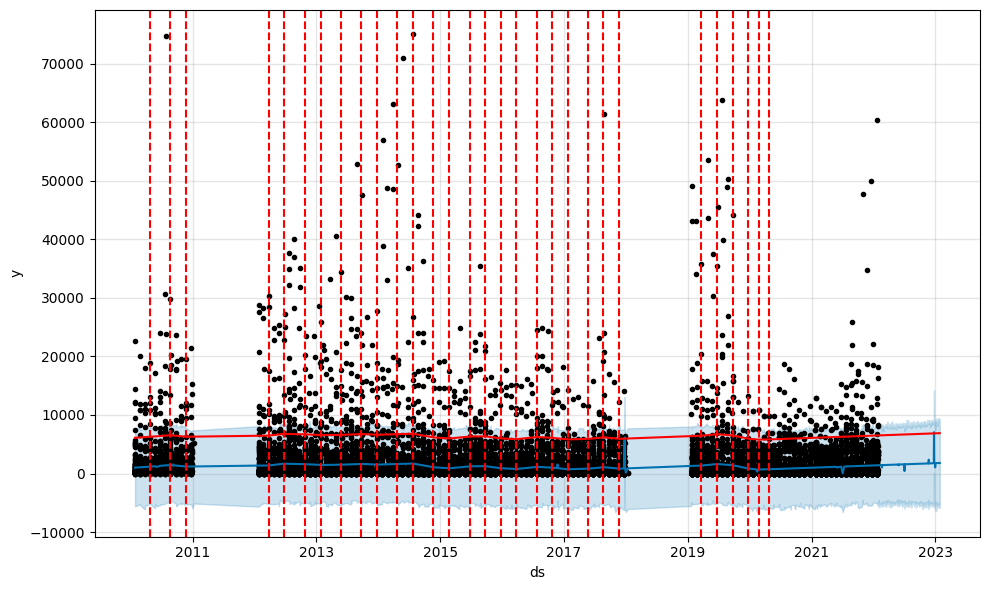

In [52]:
fig = tuned_model_daily.plot(forecast_daily, plot_cap=True, uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), tuned_model_daily, forecast_daily)

#### Prediction by Months

#### 1 Month

Mean Absolute Error : 175.10713186306538
Mean Absolute Percentage Error : 0.18845074582974336
R^2 Score : 0.6982063520303763


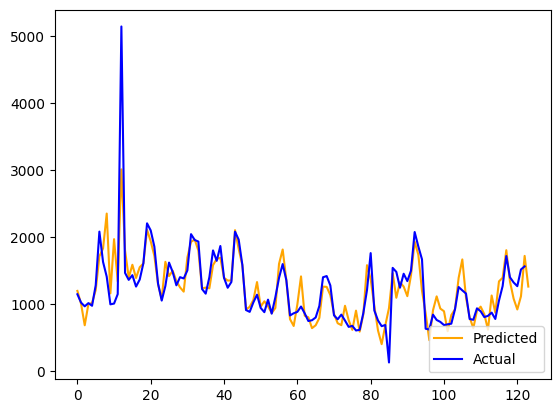

In [53]:
future_monthly, forecast_monthly = get_forecast(model=tuned_model_monthly, time_period=1, freq='M', growth='logistic')
evaluate_forecast(forecast_monthly['yhat'], monthly_ec_df['y'], 1)

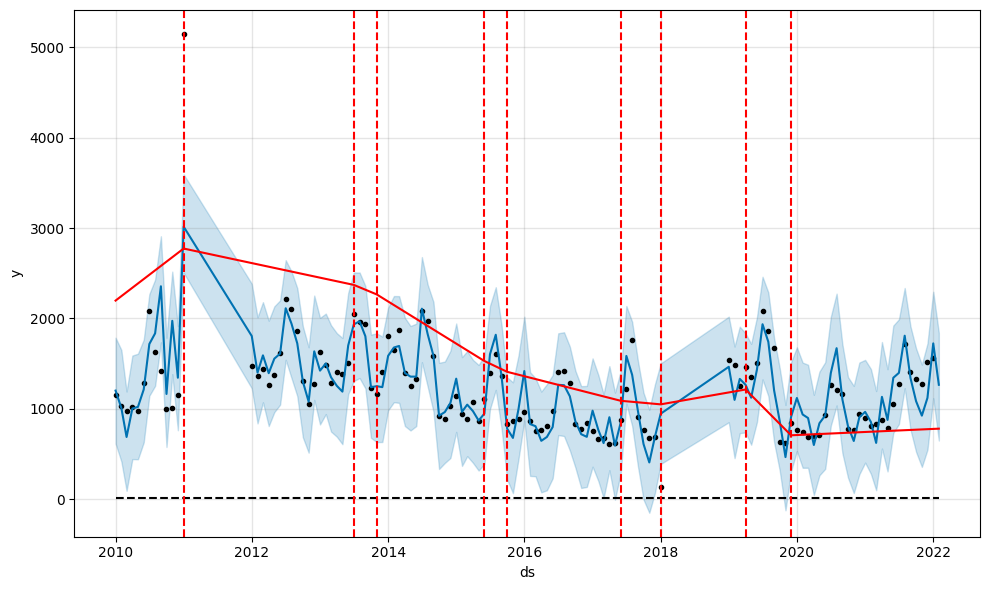

In [54]:
fig = tuned_model_monthly.plot(forecast_monthly, plot_cap=True, uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), tuned_model_monthly, forecast_monthly)

#### 6 Months

Mean Absolute Error : 175.10713186306538
Mean Absolute Percentage Error : 0.18845074582974336
R^2 Score : 0.6982063520303763


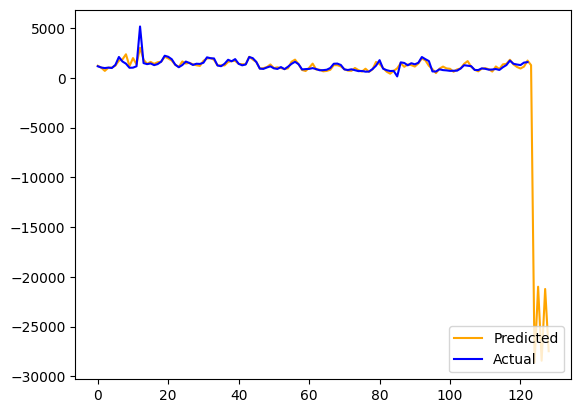

In [55]:
future_monthly, forecast_monthly = get_forecast(model=tuned_model_monthly, time_period=6, freq='M', growth='logistic')
evaluate_forecast(forecast_monthly['yhat'], monthly_ec_df['y'], 6)

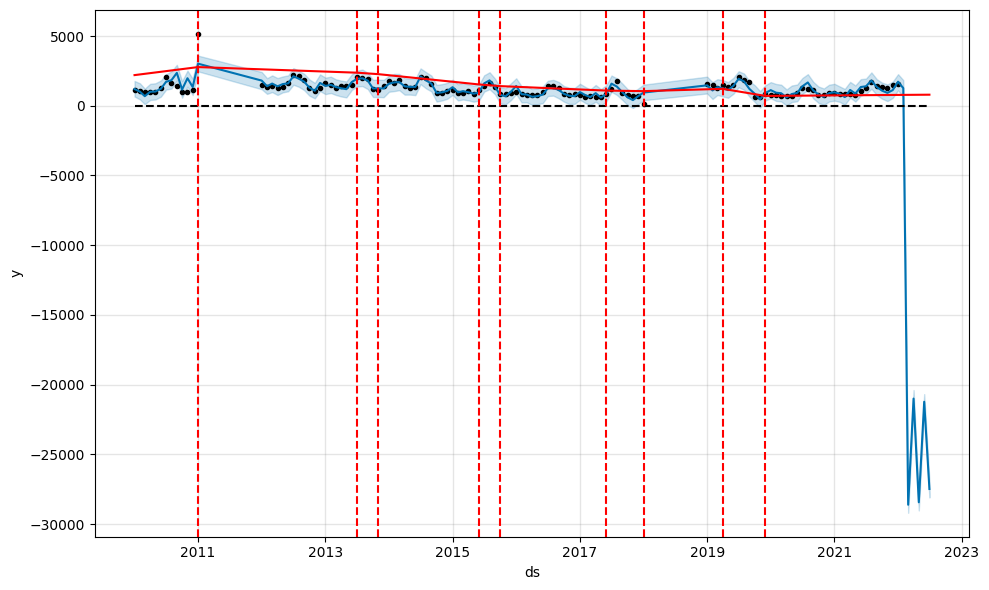

In [56]:
fig = tuned_model_monthly.plot(forecast_monthly, plot_cap=True, uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), tuned_model_monthly, forecast_monthly)

#### 12 Months

Mean Absolute Error : 175.10713186306538
Mean Absolute Percentage Error : 0.18845074582974336
R^2 Score : 0.6982063520303763


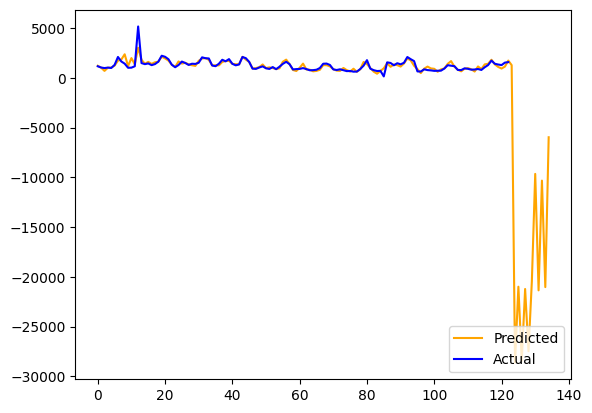

In [57]:
future_monthly, forecast_monthly = get_forecast(model=tuned_model_monthly, time_period=12, freq='M', growth='logistic')
evaluate_forecast(forecast_monthly['yhat'], monthly_ec_df['y'], 12)

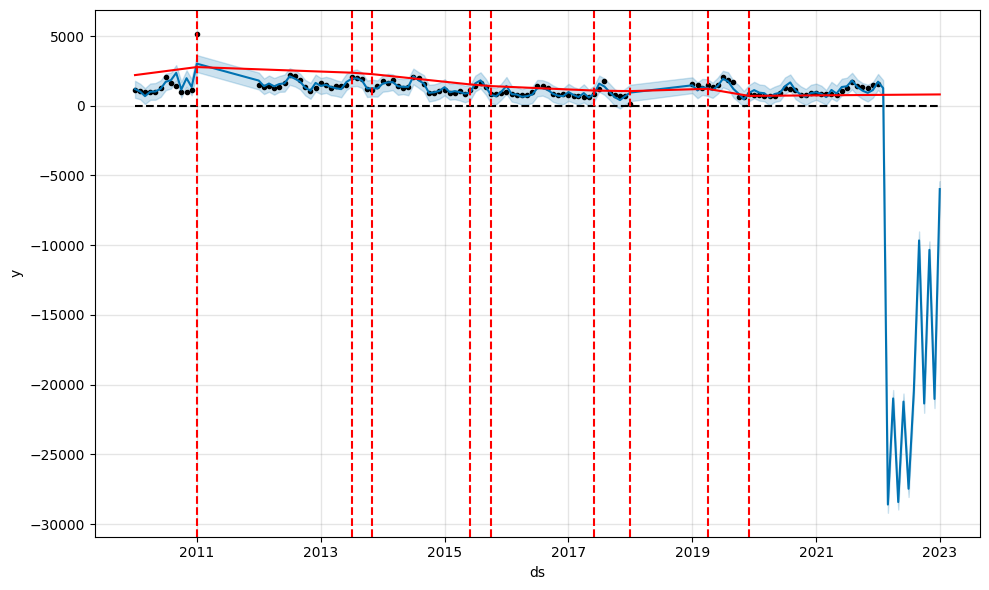

In [58]:
fig = tuned_model_monthly.plot(forecast_monthly, plot_cap=True, uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), tuned_model_monthly, forecast_monthly)

### Prediction by Year

#### 1 Year

Mean Absolute Error : 320.6456111363868
Mean Absolute Percentage Error : 0.22480528584347975
R^2 Score : 0.840371592957542


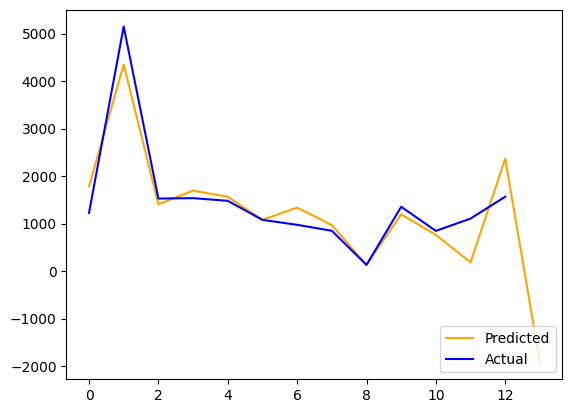

In [59]:
future_yearly, forecast_yearly = get_forecast(model=tuned_model_yearly, time_period=1, freq='Y')
evaluate_forecast(forecast_yearly['yhat'], yearly_ec_df['y'], 1)

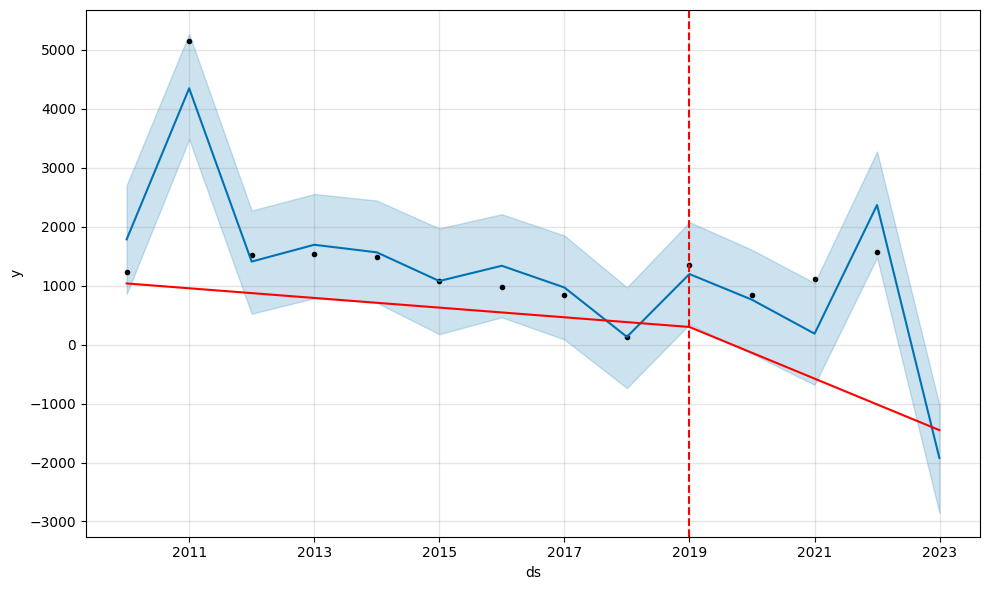

In [60]:
fig = tuned_model_yearly.plot(forecast_yearly)
a = add_changepoints_to_plot(fig.gca(), tuned_model_yearly, forecast_yearly)

#### 10 Years

Mean Absolute Error : 320.6456111363869
Mean Absolute Percentage Error : 0.2248052858434799
R^2 Score : 0.8403715929575417


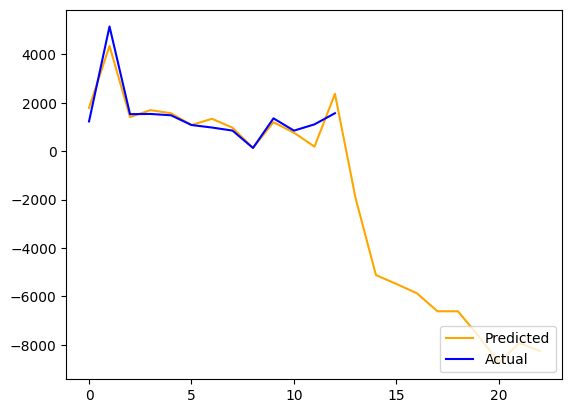

In [61]:
future_yearly, forecast_yearly = get_forecast(model=tuned_model_yearly, time_period=10, freq='Y')
evaluate_forecast(forecast_yearly['yhat'], yearly_ec_df['y'], 10)

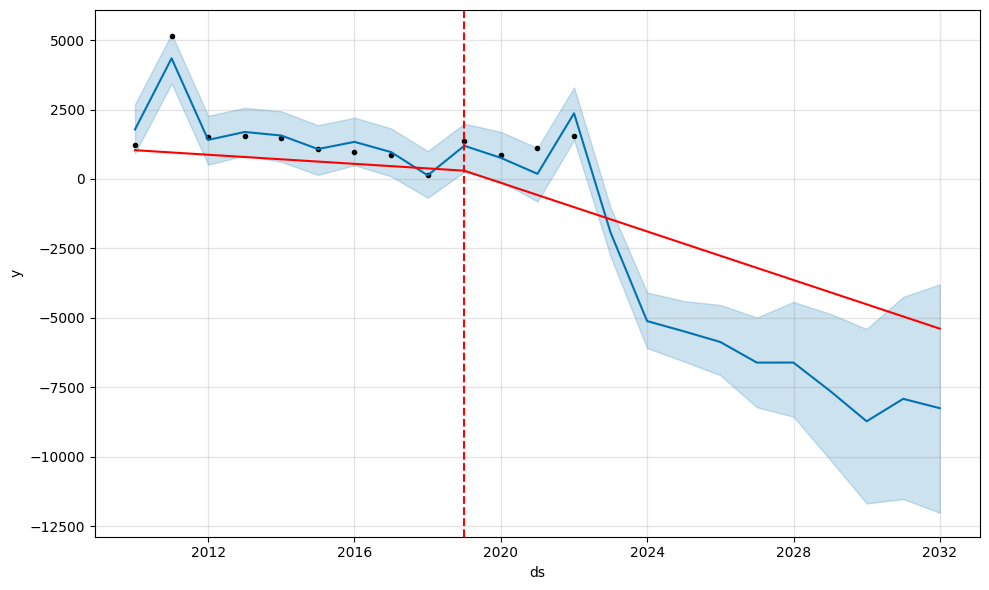

In [62]:
fig = tuned_model_yearly.plot(forecast_yearly)
a = add_changepoints_to_plot(fig.gca(), tuned_model_yearly, forecast_yearly)

#### 20 Years

Mean Absolute Error : 320.6456111363869
Mean Absolute Percentage Error : 0.2248052858434799
R^2 Score : 0.8403715929575417


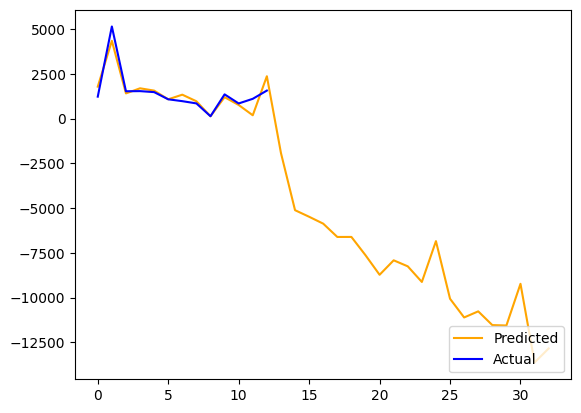

In [63]:
future_yearly, forecast_yearly = get_forecast(model=tuned_model_yearly, time_period=20, freq='Y')
evaluate_forecast(forecast_yearly['yhat'], yearly_ec_df['y'], 20)

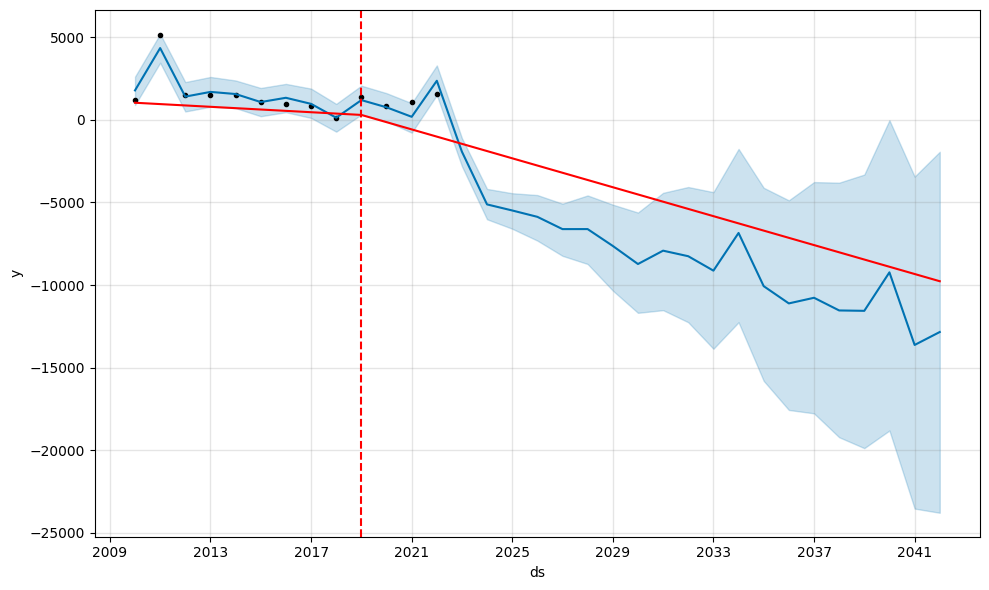

In [64]:
fig = tuned_model_yearly.plot(forecast_yearly)
a = add_changepoints_to_plot(fig.gca(), tuned_model_yearly, forecast_yearly)

In [65]:
ec_all_df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.0,2808.0,5323.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406348,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,85.77,GOV/NYC/062,Yes,276,14.23,0.0,0.0,71.54
406349,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,176.97,GOV/NYC/062,Yes,600,28.87,0.0,0.0,148.10
406350,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,61.15,GOV/NYC/062,Yes,156,7.51,0.0,0.0,53.64
406351,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,34.10,GOV/NYC/062,Yes,84,4.04,0.0,0.0,30.06


In [66]:
unique_borough_list = list(ec_all_df['Borough'].unique())

In [67]:
unique_borough_list = unique_borough_list[:5]

In [68]:
unique_borough_list

['BRONX', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND']

In [69]:
borough_group_ec_df = ec_all_df.groupby('Borough')

In [70]:
def forecast_by_borough(borough_name):
    borough_ec_df = borough_group_ec_df.get_group(borough_name).reset_index(drop=True)
    # List of columns to drop
    drop_columns = ['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
                    'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
                    'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
                    '# days', 'Meter Number', 'Estimated', 'Current Charges', 'Rate Class', 
                    'Bill Analyzed', 'Consumption (KWH)', 'Consumption (KW)', 'KW Charges', 'Other charges']

    # Drop the dataframe columns from the list using inplace
    borough_ec_df.drop(drop_columns, axis=1, inplace=True)

    borough_ec_df.columns = ['ds', 'y']

    borough_monthly_ec_df = borough_ec_df.groupby(pd.PeriodIndex(borough_ec_df['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()
    borough_yearly_ec_df = borough_ec_df.groupby(pd.PeriodIndex(borough_ec_df['ds'], freq='Y'))['y'].mean().to_timestamp().reset_index()


    borough_ec_df_test = pd.DataFrame(borough_ec_df[-100000:])
    borough_tuned_model_daily = train_tuned_model(growth='linear', seasonality='daily', df=borough_ec_df_test)
    borough_tuned_model_monthly = train_tuned_model(growth='linear', seasonality='monthly', df=borough_monthly_ec_df)
    borough_tuned_model_yearly = train_tuned_model(growth='linear', seasonality='yearly', df=borough_yearly_ec_df)

    future_daily, forecast_daily = get_forecast(model=borough_tuned_model_daily, time_period=100, freq='D', growth='linear')
    print('Prediction by Day')
    evaluate_daily_forecast(forecast_daily['yhat'], daily_ec_df['y'])
    # fig = borough_tuned_model_daily.plot(forecast_daily)
    # a = add_changepoints_to_plot(fig.gca(), borough_tuned_model_daily, forecast_daily)

    future_monthly, forecast_monthly = get_forecast(model=borough_tuned_model_monthly, time_period=1, freq='M', growth='logistic')
    print('Prediction by Month')
    evaluate_forecast(forecast_monthly['yhat'], borough_monthly_ec_df['y'], 1)
    # fig = borough_tuned_model_monthly.plot(forecast_monthly)
    # a = add_changepoints_to_plot(fig.gca(), borough_tuned_model_monthly, forecast_monthly)
    
    future_yearly, forecast_yearly = get_forecast(model=borough_tuned_model_yearly, time_period=10, freq='Y')
    print('Prediction by Year')
    evaluate_forecast(forecast_yearly['yhat'], borough_yearly_ec_df['y'], 10)
    # fig = borough_tuned_model_yearly.plot(forecast_yearly)
    # a = add_changepoints_to_plot(fig.gca(), borough_tuned_model_yearly, forecast_yearly)


Name of Borough:  BRONX


17:53:58 - cmdstanpy - INFO - Chain [1] start processing
17:54:00 - cmdstanpy - INFO - Chain [1] done processing
17:54:00 - cmdstanpy - INFO - Chain [1] start processing
17:54:00 - cmdstanpy - INFO - Chain [1] done processing
17:54:00 - cmdstanpy - INFO - Chain [1] start processing
17:54:11 - cmdstanpy - INFO - Chain [1] done processing


Prediction by Day
225
Mean Absolute Error : 1784.284582646753
Mean Absolute Percentage Error : 1.8567476217890563e+18
R^2 Score : -0.06770479409520314


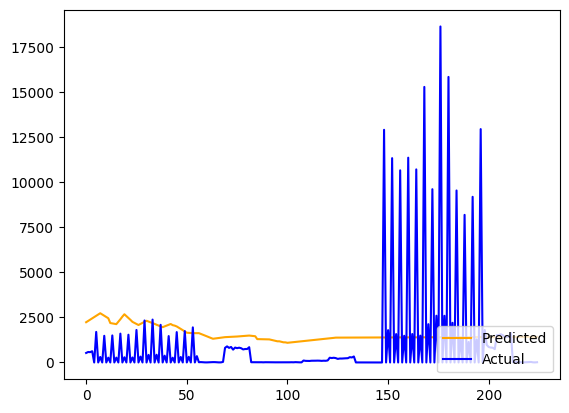

Prediction by Month
Mean Absolute Error : 92.7906308361568
Mean Absolute Percentage Error : 0.05660192561936269
R^2 Score : 0.9606450108137463


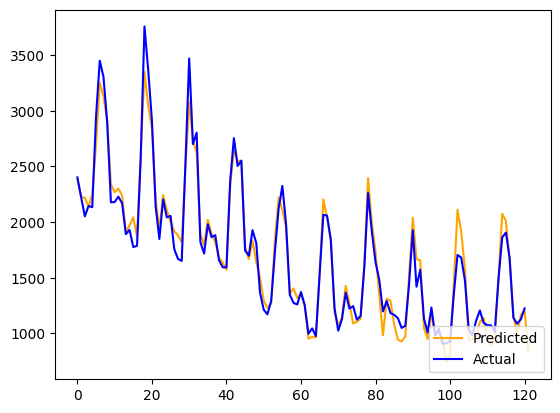

Prediction by Year
Mean Absolute Error : 0.6023206746277041
Mean Absolute Percentage Error : 0.00038868964281157714
R^2 Score : 0.9999984154779534


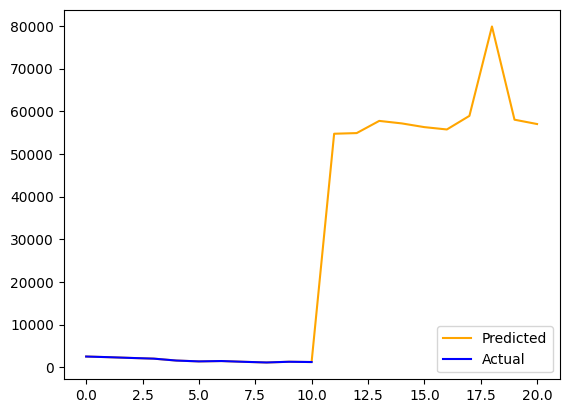





Name of Borough:  BROOKLYN


17:54:13 - cmdstanpy - INFO - Chain [1] start processing
17:54:17 - cmdstanpy - INFO - Chain [1] done processing
17:54:17 - cmdstanpy - INFO - Chain [1] start processing
17:54:17 - cmdstanpy - INFO - Chain [1] done processing
17:54:17 - cmdstanpy - INFO - Chain [1] start processing
17:54:29 - cmdstanpy - INFO - Chain [1] done processing


Prediction by Day
239
Mean Absolute Error : 1045.9664770253476
Mean Absolute Percentage Error : 2.6807308161994358e+17
R^2 Score : -0.07991029868330823


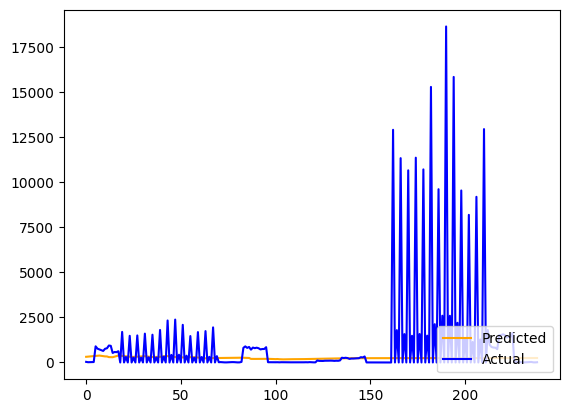

Prediction by Month
Mean Absolute Error : 19.739885028195285
Mean Absolute Percentage Error : 0.07852017565309276
R^2 Score : 0.8944647577800651


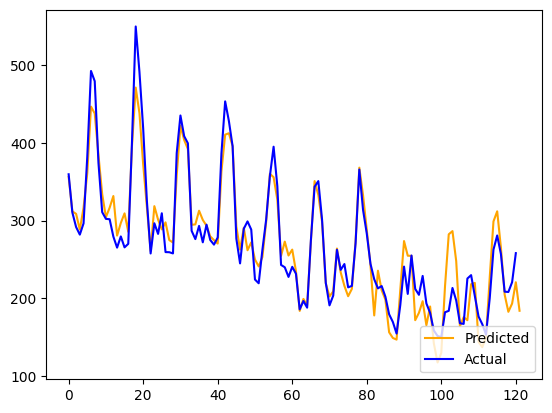

Prediction by Year
Mean Absolute Error : 0.012505274415611273
Mean Absolute Percentage Error : 4.820461161238625e-05
R^2 Score : 0.9999999478893175


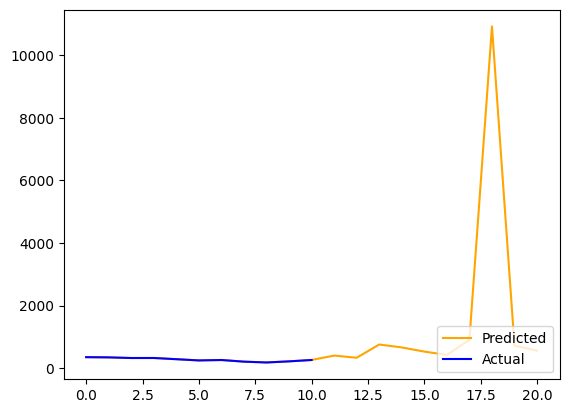





Name of Borough:  QUEENS


17:54:31 - cmdstanpy - INFO - Chain [1] start processing
17:54:31 - cmdstanpy - INFO - Chain [1] done processing
17:54:32 - cmdstanpy - INFO - Chain [1] start processing
17:54:32 - cmdstanpy - INFO - Chain [1] done processing
17:54:32 - cmdstanpy - INFO - Chain [1] start processing
17:54:32 - cmdstanpy - INFO - Chain [1] done processing


Prediction by Day
551
Mean Absolute Error : 2878.9622364398015
Mean Absolute Percentage Error : 1.963539288557165e+18
R^2 Score : -1.8933938573944418


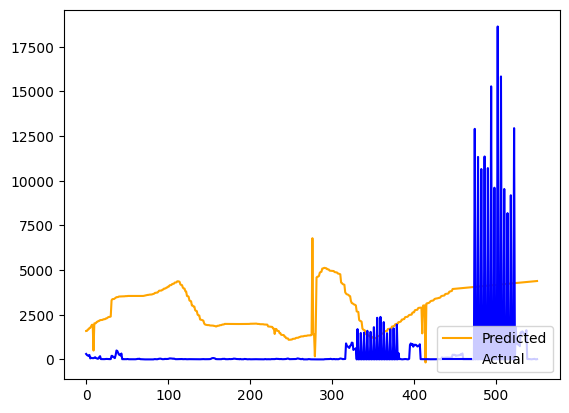

Prediction by Month
Mean Absolute Error : 521.0430865167052
Mean Absolute Percentage Error : 0.3393153666891991
R^2 Score : 0.7974621578883825


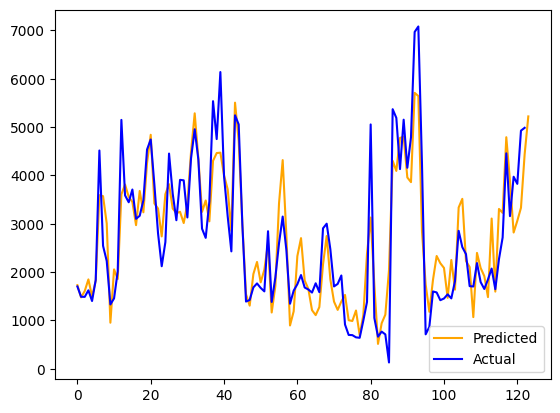

Prediction by Year
Mean Absolute Error : 407.4971292868176
Mean Absolute Percentage Error : 0.17864936456838892
R^2 Score : 0.8730950964832895


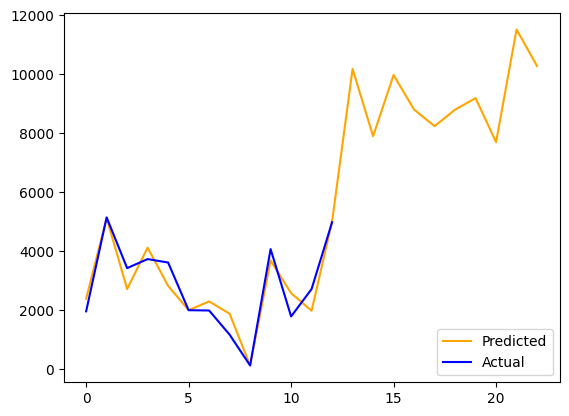





Name of Borough:  MANHATTAN


17:54:34 - cmdstanpy - INFO - Chain [1] start processing
17:54:35 - cmdstanpy - INFO - Chain [1] done processing
17:54:35 - cmdstanpy - INFO - Chain [1] start processing
17:54:35 - cmdstanpy - INFO - Chain [1] done processing
17:54:35 - cmdstanpy - INFO - Chain [1] start processing
17:54:46 - cmdstanpy - INFO - Chain [1] done processing


Prediction by Day
222
Mean Absolute Error : 1177.4188629564394
Mean Absolute Percentage Error : 4.514421154399125e+17
R^2 Score : -0.042731249152703876


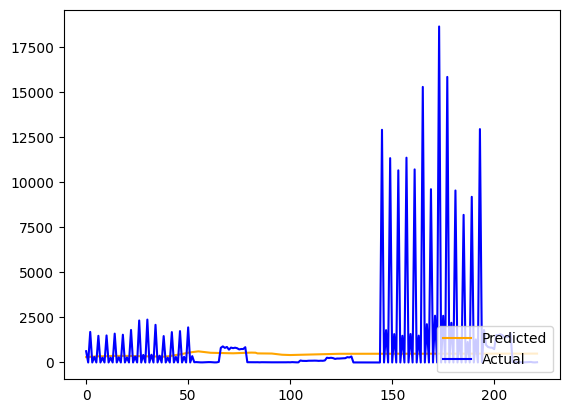

Prediction by Month
Mean Absolute Error : 28.18054729955995
Mean Absolute Percentage Error : 0.06671172265547623
R^2 Score : 0.9302540160546245


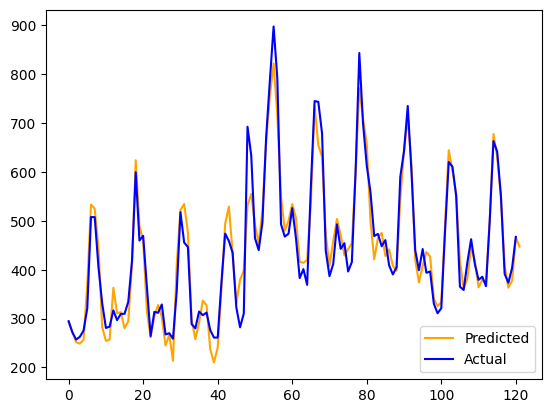

Prediction by Year
Mean Absolute Error : 0.004884211418884247
Mean Absolute Percentage Error : 1.12047628354225e-05
R^2 Score : 0.9999999963039456


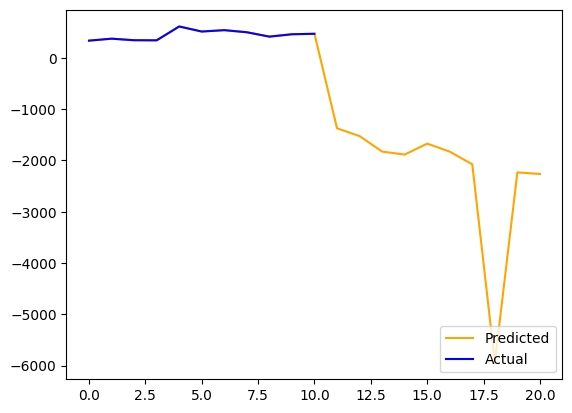





Name of Borough:  STATEN ISLAND


17:54:48 - cmdstanpy - INFO - Chain [1] start processing
17:54:48 - cmdstanpy - INFO - Chain [1] done processing
17:54:48 - cmdstanpy - INFO - Chain [1] start processing
17:54:48 - cmdstanpy - INFO - Chain [1] done processing
17:54:48 - cmdstanpy - INFO - Chain [1] start processing
17:54:59 - cmdstanpy - INFO - Chain [1] done processing


Prediction by Day
221
Mean Absolute Error : 2847.7760351298284
Mean Absolute Percentage Error : 3.305935254562924e+18
R^2 Score : -0.4870541858497188


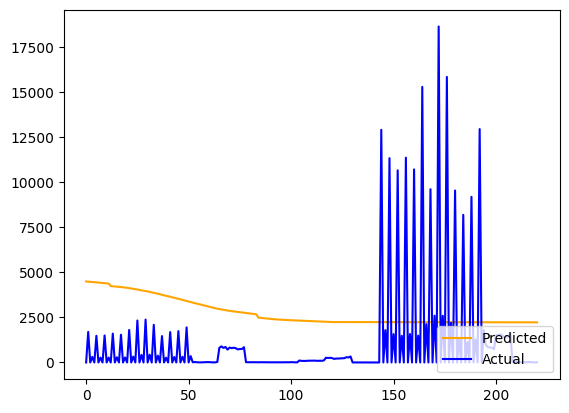

Prediction by Month
Mean Absolute Error : 227.73955014938798
Mean Absolute Percentage Error : 0.11098677893447144
R^2 Score : 0.9005152382613377


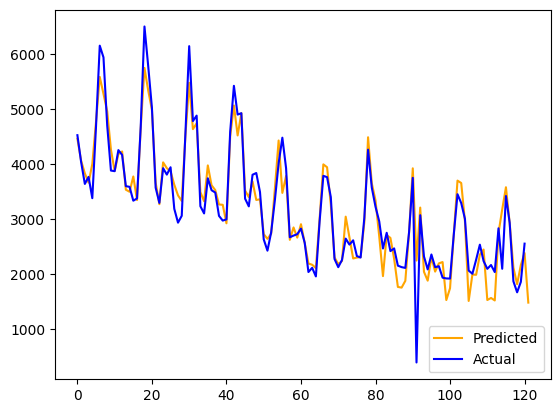

Prediction by Year
Mean Absolute Error : 0.2637193785383054
Mean Absolute Percentage Error : 8.854605098257889e-05
R^2 Score : 0.9999998845110951


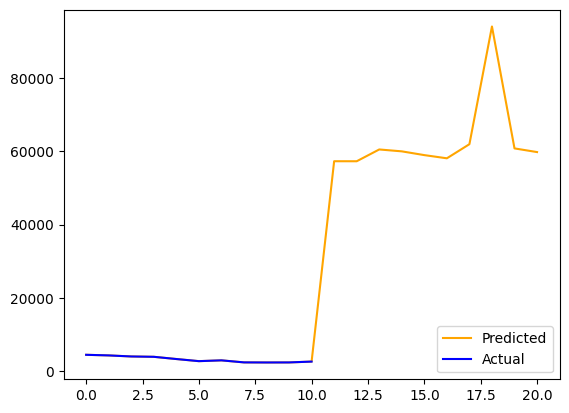

In [71]:
for borough in unique_borough_list:
    print("\nName of Borough: ", borough)
    forecast_by_borough(borough)
    print('\n\n')